In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_13c5f23e088e4651bc569838bd3166ec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='D7dgshw8K8_2UknjqSOB6TgmmOod-IMOmOWKQrUmQ5J2',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_13c5f23e088e4651bc569838bd3166ec.get_object(Bucket='datascience320finalproject-donotdelete-pr-oghkbzvbwhznzj',Key='ClusteredData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,NumberForCity,NumberForState,NumberForTitle,emp_prse,jobs_1000,loc_quotient,pct_total,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct90,annual,Clus_km
0,0,0,0,10610,2.5,61.779,1.17,55.59,115630,1.8,26.68,36.03,48.94,64.70,93.24,55490,74950,134580,193930,22
1,1,0,0,2100,4.2,59.206,1.13,47.45,98700,2.0,25.91,33.35,45.29,57.46,70.47,53900,69370,119510,146580,12
2,2,1,0,1330,5.8,30.357,0.58,44.71,92990,4.4,21.01,28.17,39.36,55.03,74.59,43710,58590,114460,155150,12
3,3,1,0,1980,4.0,34.376,0.65,52.00,108170,5.5,22.64,33.27,46.15,62.54,86.93,47080,69190,130080,180810,22
4,4,1,0,22980,2.5,45.012,0.86,56.49,117500,1.2,25.25,34.87,48.76,69.16,97.22,52520,72520,143850,202220,22


In [4]:
df1=df.drop(['Clus_km'], axis=1)
df1.head()

,NumberForCity,NumberForState,NumberForTitle,emp_prse,jobs_1000,loc_quotient,pct_total,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct90,annual
0,0,0,0,10610,2.5,61.779,1.17,55.59,115630,1.8,26.68,36.03,48.94,64.70,93.24,55490,74950,134580,193930
1,1,0,0,2100,4.2,59.206,1.13,47.45,98700,2.0,25.91,33.35,45.29,57.46,70.47,53900,69370,119510,146580
2,2,1,0,1330,5.8,30.357,0.58,44.71,92990,4.4,21.01,28.17,39.36,55.03,74.59,43710,58590,114460,155150
3,3,1,0,1980,4.0,34.376,0.65,52.00,108170,5.5,22.64,33.27,46.15,62.54,86.93,47080,69190,130080,180810
4,4,1,0,22980,2.5,45.012,0.86,56.49,117500,1.2,25.25,34.87,48.76,69.16,97.22,52520,72520,143850,202220


In [5]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [6]:
def doGMM(X, nclust=10):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)





In [7]:
clust_labels3 = doGMM(df1,10)


In [8]:
gmm = pd.DataFrame(clust_labels3)



In [9]:
df1.insert((df1.shape[1]),'gmm',gmm)

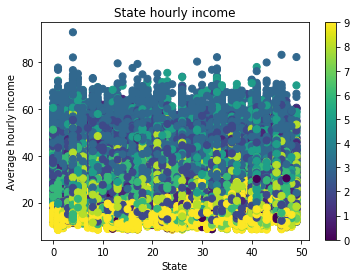

In [22]:

#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForState'],df1['a_mean'],
                     c=gmm[0],s=50)
ax.set_title('State hourly income')
ax.set_xlabel('State')
ax.set_ylabel('Average hourly income')
plt.colorbar(scatter)

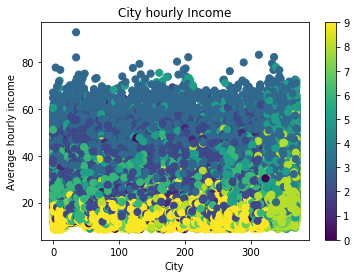

In [23]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForCity'],df1['a_mean'],
                     c=gmm[0],s=50)
ax.set_title('City hourly Income')
ax.set_xlabel('City')
ax.set_ylabel('Average hourly income')
plt.colorbar(scatter)

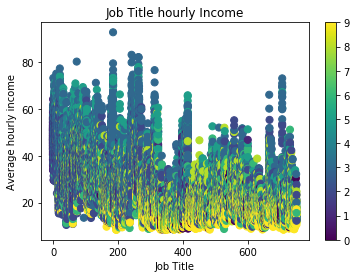

In [24]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForTitle'],df1['a_mean'],
                     c=gmm[0],s=50)
ax.set_title('Job Title hourly Income')
ax.set_xlabel('Job Title')
ax.set_ylabel('Average hourly income')
plt.colorbar(scatter)

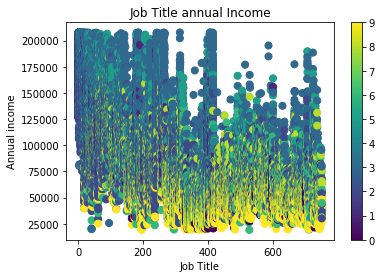

In [25]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForTitle'],df1['annual'],
                     c=gmm[0],s=50)
ax.set_title('Job Title annual Income')
ax.set_xlabel('Job Title')
ax.set_ylabel('Annual income')
plt.colorbar(scatter)

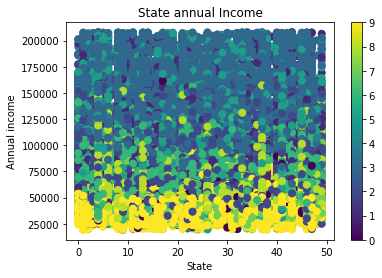

In [26]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForState'],df1['annual'],
                     c=gmm[0],s=50)
ax.set_title('State annual Income')
ax.set_xlabel('State')
ax.set_ylabel('Annual income')
plt.colorbar(scatter)

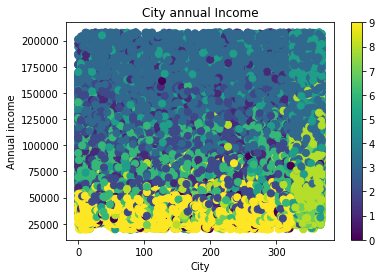

In [27]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForCity'],df1['annual'],
                     c=gmm[0],s=50)
ax.set_title('City annual Income')
ax.set_xlabel('City')
ax.set_ylabel('Annual income')
plt.colorbar(scatter)

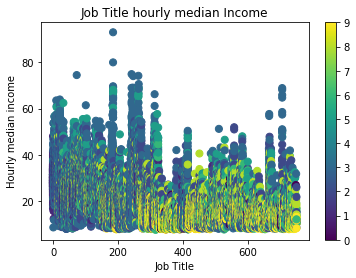

In [28]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForTitle'],df1['h_median'],
                     c=gmm[0],s=50)
ax.set_title('Job Title hourly median Income')
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly median income')
plt.colorbar(scatter)

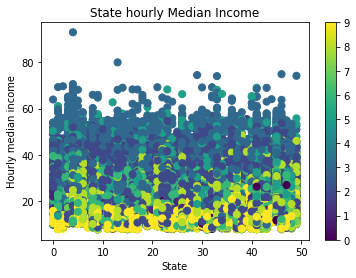

In [29]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForState'],df1['h_median'],
                     c=gmm[0],s=50)
ax.set_title('State hourly Median Income')
ax.set_xlabel('State')
ax.set_ylabel('Hourly median income')
plt.colorbar(scatter)

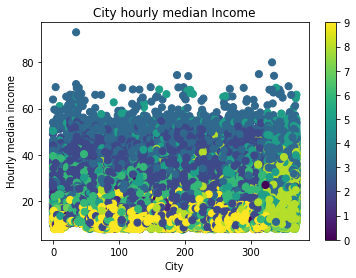

In [30]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForCity'],df1['h_median'],
                     c=gmm[0],s=50)
ax.set_title('City hourly median Income')
ax.set_xlabel('City')
ax.set_ylabel('Hourly median income')
plt.colorbar(scatter)

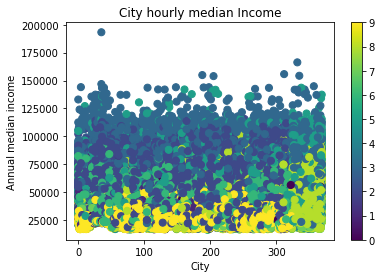

In [32]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForCity'],df1['a_median'],
                     c=gmm[0],s=50)
ax.set_title('City hourly median Income')
ax.set_xlabel('City')
ax.set_ylabel('Annual median income')
plt.colorbar(scatter)

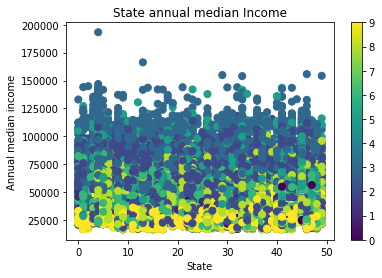

In [33]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForState'],df1['a_median'],
                     c=gmm[0],s=50)
ax.set_title('State annual median Income')
ax.set_xlabel('State')
ax.set_ylabel('Annual median income')
plt.colorbar(scatter)

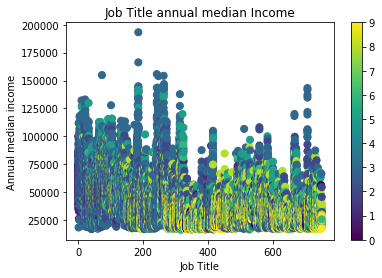

In [34]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['NumberForTitle'],df1['a_median'],
                     c=gmm[0],s=50)
ax.set_title('Job Title annual median Income')
ax.set_xlabel('Job Title')
ax.set_ylabel('Annual median income')
plt.colorbar(scatter)